# Before you run this notebook

### Create the conda environment from the env_class.yml file.  You can look it up on the Anacaonda documentation website but I will give you the readers digerst version.  You can do this from the Anaconda Prompt (installed with your Anaconda version) or any command (windows) / bash terminal (linux).

#### Create the environment

```conda env create --file env_class.yml```

#### Activate the enironment

windows -> ```acivate seyi_class```

linux -> ```conda acivate seyi_class```

#### \*\* Note: I put a couple of examples of how to pull packages from a git repo and how to tell Anaconda you want a specific version of a package.

In [1]:
# package import
from BicycleClass import BicycleAnalysis
import pandas
import matplotlib

import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

# Data Import

I would look at the code in the load_data() method.  I used os.walk() to find all the files in the directory.

In [3]:
bicycle_analysis = BicycleAnalysis()
bicycle_analysis.load_data(m_bool_filter_columns = True)

True

# Data Exploration

Our goal is to undersand the data set as it is which will give us some insight on what we want to do in the transformation phase.

### Let's look at the Training set first.



In [4]:
bicycle_analysis.basic_exploration()

BikeBiyer column excluded

train dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7685 entries, 0 to 7684
Data columns (total 12 columns):
Occupation              7685 non-null object
NumberChildrenAtHome    7685 non-null int64
HomeOwnerFlag           7685 non-null int64
Education               7685 non-null object
CountryRegionName       7685 non-null object
YearlyIncome            7685 non-null int64
StateProvinceName       7685 non-null object
AveMonthSpend           7685 non-null int64
Gender                  7685 non-null object
MaritalStatus           7685 non-null object
NumberCarsOwned         7685 non-null int64
TotalChildren           7685 non-null int64
dtypes: int64(6), object(6)
memory usage: 720.5+ KB

First three records of train data set
       Occupation  NumberChildrenAtHome  HomeOwnerFlag   Education  \
0          Manual                     0              1  Bachelors    
1    Professional                     0              0  Bachelors    
2  Skilled M

# Need to redo the below comments

There are two types of columns, ones with categorical values and ones with numerical values.  The ```BikeBuyer``` column is what we are trying to predict.  ```1``` is the person bought a bicycle while ```0``` is the person didn't buy the bicycle.

The columns do not have any numpy.NaN values (this is from additional analysis).

There is some basic information about where the person lives, their education level, what they do for work, gender, marital status, if they own a home, the number of children in the home, the total number of children, yearly income and average monthly spend.

There are only two continuous variables ```YearlyIncome``` and ```AveMonthSpend```.  The other integer columns can be converted to a category.

### Let's look at the test set

In [5]:
bicycle_analysis.basic_exploration(False)

BikeBiyer column excluded

test dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
Occupation              3328 non-null object
NumberChildrenAtHome    3328 non-null int64
HomeOwnerFlag           3328 non-null int64
Education               3328 non-null object
CountryRegionName       3328 non-null object
YearlyIncome            3328 non-null int64
StateProvinceName       3328 non-null object
AveMonthSpend           3328 non-null int64
Gender                  3328 non-null object
MaritalStatus           3328 non-null object
NumberCarsOwned         3328 non-null int64
TotalChildren           3328 non-null int64
dtypes: int64(6), object(6)
memory usage: 312.1+ KB

First three records of test data set
       Occupation  NumberChildrenAtHome  HomeOwnerFlag   Education  \
0          Manual                     0              1  Bachelors    
1    Professional                     0              0  Bachelors    
2  Skilled Man

comments about test set

### Let's look at each categorical variable.

We are looking at the distribution of each categorical variable.

Comparing train and test data sets.



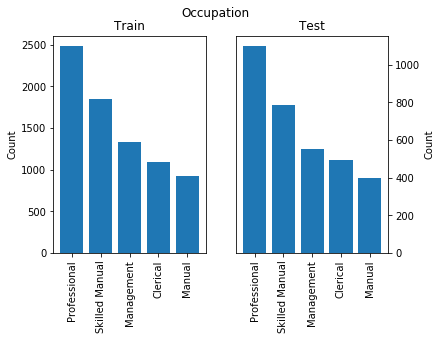

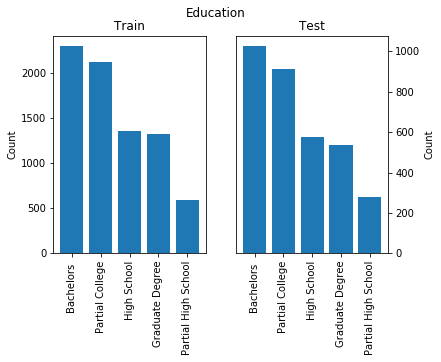

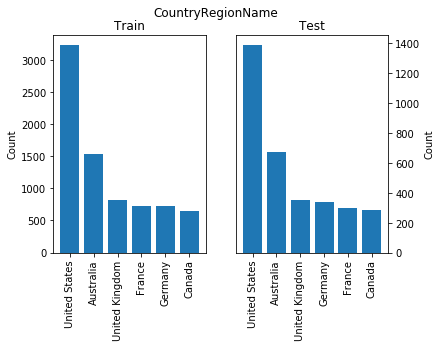

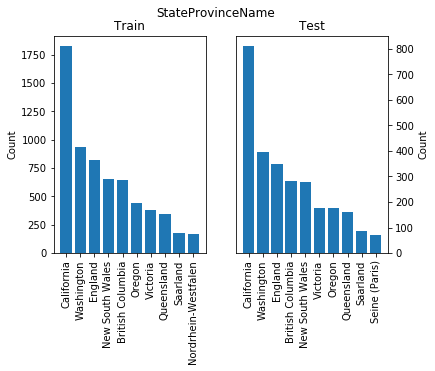

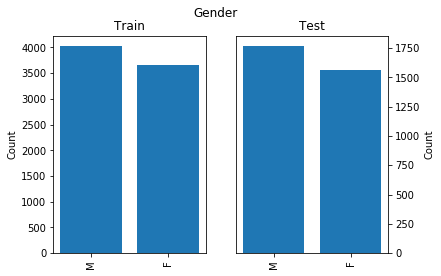

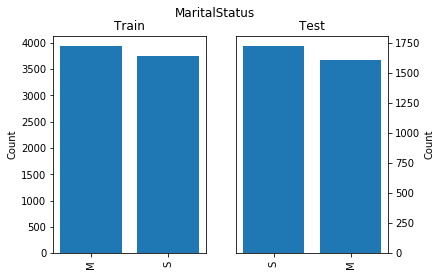

In [6]:
bicycle_analysis.compare_train_test(m_list_flags = ['categorical_columns'])

__StateProvinceName__ has 40+ unique values so the plot is limited to the top 10.  California has more bicycle buyers by almost 2x compared to the next highest category.  The __United States__ has more bicycle buyers but this could be because the population is higher.

### Let's look at what we are trying to predict

We want to look at the distribtion and see if it is skwed.  If it is we may have to resample with replacement to the precision, recall and F1 score isn't skewed.

Comparing train and test data sets.



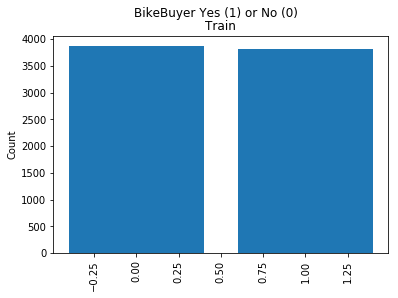

In [7]:
bicycle_analysis.compare_train_test(m_list_flags = ['prediction_column'])

The distribion of bicycle buyers verses non-bicycle buyers looks pretty even.  No need to resample with replacement.

## SAVE FOR DOCUMENTATION